# <font color=red>Exploratory Data Analysis of 10 years of Los Angeles Traffic Accident History</font>
# <font color=red>N. J. Laurita</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from datetime import date

## <font color=red>Lets load and look at the data </font>

In [6]:
#---Lets load the data and take a look at the head and info to get a feel for it---#
#---From this we see that there are 502858 rows and 24 columns---#
collision_df = pd.read_csv('traffic-collision-data-from-2010-to-present.csv')
pd.set_option('max_columns', None)
collision_df.head(10)

,DR_number,date_reported,date_occurred,time_occurred,area_ID,area_name,reporting_district,crime_code,crime_code_description,MO_codes,victim_age,victim_sex,victim_descent,premise_code,premise_description,address,cross_street,location,zip_codes,census_tracts,precint_boundaries,LA_specific_plans,council_districts,neighborhood_council
0,191323054,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,13,Newton,1385,997,TRAFFIC COLLISION,NaN,NaN,F,H,101.0,STREET,SAN PEDRO ST,SLAUSON AV,"{'longitude': '-118.2696', 'human_address': '{...",22352.0,786.0,858.0,7.0,13.0,46.0
1,192020666,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,15,20,Olympic,2054,997,TRAFFIC COLLISION,NaN,40.0,M,W,101.0,STREET,OLYMPIC BL,KINGSLEY AV,"{'longitude': '-118.3031', 'human_address': '{...",22723.0,617.0,646.0,NaN,12.0,89.0
2,191616992,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,230,16,Foothill,1669,997,TRAFFIC COLLISION,NaN,18.0,M,W,101.0,STREET,TUJUNGA CANYON BL,LA TUNA CANYON RD,"{'longitude': '-118.2704', 'human_address': '{...",3222.0,5.0,227.0,NaN,1.0,7.0
3,191824082,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,730,18,Southeast,1802,997,TRAFFIC COLLISION,605,23.0,M,H,101.0,STREET,88TH ST,MAIN ST,"{'longitude': '-118.2739', 'human_address': '{...",22352.0,800.0,358.0,7.0,14.0,45.0
4,191616980,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,720,16,Foothill,1689,997,TRAFFIC COLLISION,NaN,NaN,M,H,101.0,STREET,CROCKETT,SUNLAND,"{'longitude': '-118.3703', 'human_address': '{...",19335.0,166.0,272.0,NaN,3.0,21.0
5,191824078,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1050,18,Southeast,1836,997,TRAFFIC COLLISION,4025 3037 3004 3026 3101,54.0,F,B,101.0,STREET,COMPTON AV,109TH ST,"{'longitude': '-118.2463', 'human_address': '{...",24354.0,817.0,1187.0,7.0,15.0,40.0
6,190417458,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,130,4,Hollenbeck,411,997,TRAFFIC COLLISION,605,33.0,F,B,101.0,STREET,BROADWAY,PASADENA AV,"{'longitude': '-118.2242', 'human_address': '{...",23448.0,492.0,943.0,1.0,11.0,1.0
7,191616985,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,700,16,Foothill,1687,997,TRAFFIC COLLISION,NaN,35.0,M,H,101.0,STREET,TUJUNGA AV,PENROSE ST,"{'longitude': '-118.3795', 'human_address': '{...",19335.0,162.0,272.0,NaN,3.0,21.0
8,191718751,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,1230,17,Devonshire,1775,997,TRAFFIC COLLISION,NaN,51.0,M,O,101.0,STREET,WISH,VINCENNES,"{'longitude': '-118.5084', 'human_address': '{...",18514.0,104.0,1422.0,NaN,2.0,87.0
9,191718743,2019-11-30T00:00:00.000,2019-11-30T00:00:00.000,10,17,Devonshire,1737,997,TRAFFIC COLLISION,NaN,23.0,F,H,101.0,STREET,HAYVENHURST,SAN FERNANDO MISSION,"{'longitude': '-118.4934', 'human_address': '{...",19329.0,78.0,382.0,NaN,2.0,79.0


## <font color=red>Lets clean up the data and it's formating </font>

In [7]:
#---First lets add an index column that labels the rows---#
collision_df.insert(0, 'index', np.arange(len(collision_df)))
collision_df['index'] = np.arange(len(collision_df))

#---Lets clean up date_reported and date_occurred, we don't need the 'T' and all the trailling zeros---#
collision_df['date_reported'] = collision_df.date_reported.apply(lambda x: x.split('T')[0])
collision_df['date_reported'] = collision_df.date_reported.astype(str)

collision_df['date_occurred'] = collision_df.date_occurred.apply(lambda x: x.split('T')[0])
collision_df['date_occurred'] = collision_df.date_occurred.astype(str)

#---Now that we have the dates cleaned up, lets convert them to the date objects via the datetime package---#
collision_df['date_reported'] = collision_df.date_reported.apply(lambda x: date.fromisoformat(x))
collision_df['date_occurred'] = collision_df.date_occurred.apply(lambda x: date.fromisoformat(x))

#---Lets convert the data occurred into a an actual day of the week, this will tell us which day has the most accidents---#
collision_df.insert(5, 'weekday_occurred', "")
collision_df['weekday_occurred'] = collision_df.date_occurred.apply(lambda x: x.strftime('%A'))

#---Now that they're date objects we can also subtract them and make a time delta and convert back to float---#
collision_df.insert(4, 'date_delta', "")
collision_df['date_delta'] = collision_df['date_reported'] - collision_df['date_occurred']
collision_df['date_delta'] = collision_df.date_delta.astype(str)
collision_df['date_delta'] = collision_df.date_delta.apply(lambda x: x.split(' ')[0])
collision_df['date_delta'] = collision_df.date_delta.apply(lambda x: float(x))

#---We can lose the crime_code and crime_code_description columns, their the same for all rows---#
del collision_df['crime_code']
del collision_df['crime_code_description']

#---Lets also delete the premise_code columns, the premise_description already defines them---#
del collision_df['premise_code']

#---Lets convert preimise_description to title case---#
collision_df['premise_description'] = collision_df.premise_description.apply(lambda x: str(x))   
collision_df['premise_description'] = collision_df.premise_description.apply(lambda x: x.title())

#---The addresses and cross streets have tons of white space in their names and are in all caps, lets clean them up---#
collision_df['address'] = collision_df.address.apply(lambda x: str(x))
collision_df['address'] = collision_df.address.apply(lambda x: x.title())
collision_df['address'] = collision_df.address.apply(lambda x: " ".join(x.split()))

collision_df['cross_street'] = collision_df.cross_street.apply(lambda x: str(x))   
collision_df['cross_street'] = collision_df.cross_street.apply(lambda x: x.title())
collision_df['cross_street'] = collision_df.cross_street.apply(lambda x: " ".join(x.split()))

#---Lets also create a columns called intersection which combines the address and cross street---#
collision_df.insert(18, 'intersection', "")
collision_df['intersection'] = collision_df['address'] + ", " + collision_df['cross_street']

#---Finally, lets clean up the location columns which contains the longitude and latitude in a complicated string---#
collision_df.insert(20, 'longitude', "")
collision_df['longitude'] = collision_df.location.apply(lambda x: x.split("'")[3])
collision_df['longitude'] = collision_df.longitude.apply(lambda x: float(x))

collision_df.insert(21, 'latitude', "")
collision_df['latitude'] = collision_df.location.apply(lambda x: x.split("'")[11])
collision_df['latitude'] = collision_df.latitude.apply(lambda x: float(x))

del collision_df['location']

#---Now print the head of our improved dataframe---#
collision_df.head(10)


,index,DR_number,date_reported,date_occurred,date_delta,time_occurred,weekday_occurred,area_ID,area_name,reporting_district,MO_codes,victim_age,victim_sex,victim_descent,premise_description,address,cross_street,intersection,zip_codes,longitude,latitude,census_tracts,precint_boundaries,LA_specific_plans,council_districts,neighborhood_council
0,0,191323054,2019-11-30,2019-11-30,0.0,130,Saturday,13,Newton,1385,NaN,NaN,F,H,Street,San Pedro St,Slauson Av,"San Pedro St, Slauson Av",22352.0,-118.2696,33.9885,786.0,858.0,7.0,13.0,46.0
1,1,192020666,2019-11-30,2019-11-30,0.0,15,Saturday,20,Olympic,2054,NaN,40.0,M,W,Street,Olympic Bl,Kingsley Av,"Olympic Bl, Kingsley Av",22723.0,-118.3031,34.0526,617.0,646.0,NaN,12.0,89.0
2,2,191616992,2019-11-30,2019-11-30,0.0,230,Saturday,16,Foothill,1669,NaN,18.0,M,W,Street,Tujunga Canyon Bl,La Tuna Canyon Rd,"Tujunga Canyon Bl, La Tuna Canyon Rd",3222.0,-118.2704,34.2339,5.0,227.0,NaN,1.0,7.0
3,3,191824082,2019-11-30,2019-11-30,0.0,730,Saturday,18,Southeast,1802,605,23.0,M,H,Street,88Th St,Main St,"88Th St, Main St",22352.0,-118.2739,33.9572,800.0,358.0,7.0,14.0,45.0
4,4,191616980,2019-11-30,2019-11-30,0.0,720,Saturday,16,Foothill,1689,NaN,NaN,M,H,Street,Crockett,Sunland,"Crockett, Sunland",19335.0,-118.3703,34.2215,166.0,272.0,NaN,3.0,21.0
5,5,191824078,2019-11-30,2019-11-30,0.0,1050,Saturday,18,Southeast,1836,4025 3037 3004 3026 3101,54.0,F,B,Street,Compton Av,109Th St,"Compton Av, 109Th St",24354.0,-118.2463,33.9368,817.0,1187.0,7.0,15.0,40.0
6,6,190417458,2019-11-30,2019-11-30,0.0,130,Saturday,4,Hollenbeck,411,605,33.0,F,B,Street,Broadway,Pasadena Av,"Broadway, Pasadena Av",23448.0,-118.2242,34.0720,492.0,943.0,1.0,11.0,1.0
7,7,191616985,2019-11-30,2019-11-30,0.0,700,Saturday,16,Foothill,1687,NaN,35.0,M,H,Street,Tujunga Av,Penrose St,"Tujunga Av, Penrose St",19335.0,-118.3795,34.2233,162.0,272.0,NaN,3.0,21.0
8,8,191718751,2019-11-30,2019-11-30,0.0,1230,Saturday,17,Devonshire,1775,NaN,51.0,M,O,Street,Wish,Vincennes,"Wish, Vincennes",18514.0,-118.5084,34.2418,104.0,1422.0,NaN,2.0,87.0
9,9,191718743,2019-11-30,2019-11-30,0.0,10,Saturday,17,Devonshire,1737,NaN,23.0,F,H,Street,Hayvenhurst,San Fernando Mission,"Hayvenhurst, San Fernando Mission",19329.0,-118.4934,34.2720,78.0,382.0,NaN,2.0,79.0


# <font color=red> Here's some interesting facts we learn from the data: </font>

### <font color=blue> Traffic accidents are well distributed through the day and mostly involve people in their late 20's and early 30's </font>

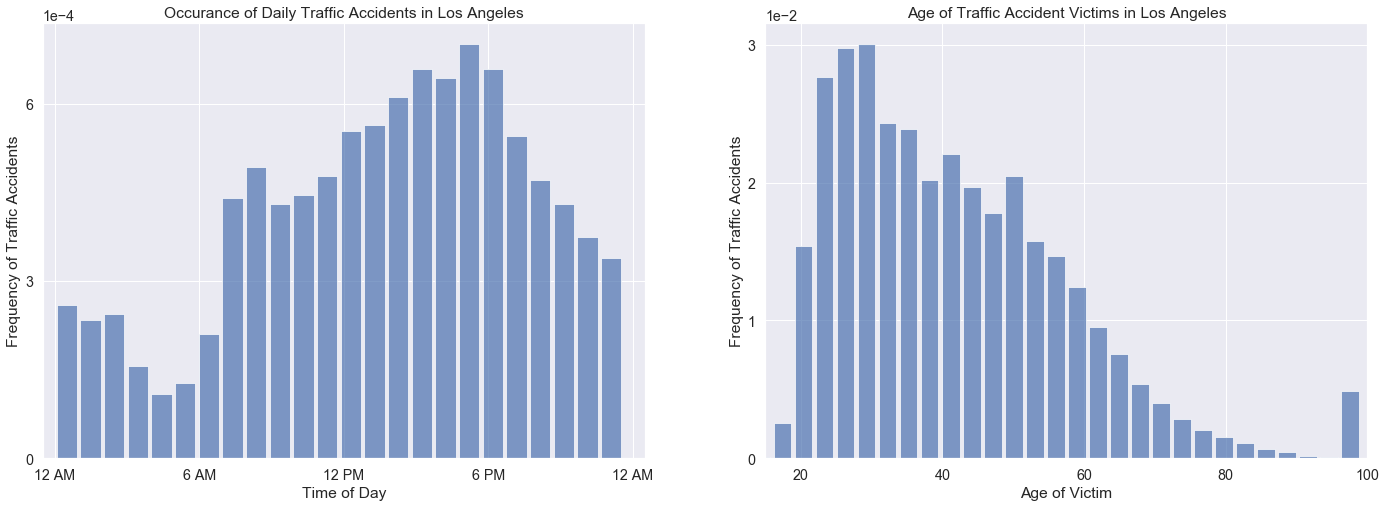

In [14]:
#---Lets start by asking the obvious questions---#
#---1: What times do accidents in LA occur?---#
#---2: Who is most affected by traffic accidents?---#

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set(font_scale=1.3)

#---Lets make two graphs to display this data---#
fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Intersections In Los Angeles')
fig.set_figheight(8)
fig.set_figwidth(20)

#------What times do accidents in LA occur?------#
plt.subplot(121)
ax1 = plt.hist(collision_df.time_occurred, bins=24, color='b', alpha=0.7, rwidth=0.85, density=True)
plt.yticks([0, 0.0003, 0.0006])
plt.xticks([0, 600, 1200, 1800, 2400],['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
#ax1.set_xticklabels(['12:00 AM', '6:00 AM', '12:00 PM', '6:00 PM', '12:00 AM'])
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.xlim(-50, 2450)
plt.xlabel(f'Time of Day')
plt.ylabel('Frequency of Traffic Accidents')
plt.title(f'Occurance of Daily Traffic Accidents in Los Angeles')

#---What are the ages of victims of traffic accident in LA?---#
plt.subplot(122)
ax2 = plt.hist(collision_df.victim_age, bins=30, color='b', alpha=0.7, rwidth=0.85, density=True)
#ax2 = plt.subplot()
plt.yticks([0, 0.01, 0.02, 0.03])
plt.xticks([0, 20, 40, 60, 80, 100])
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.xlim(15, 100)
plt.xlabel(f'Age of Victim')
plt.ylabel('Frequency of Traffic Accidents')
plt.title(f'Age of Traffic Accident Victims in Los Angeles')

#---Now adjust and show the plots---#
plt.subplots_adjust(left=0.05, right=0.97)
plt.show()

#---Lets save this figure and close out of it---#
fig.savefig('Time_Age_Distributions.pdf', dpi=150)
plt.close('all')


C:\Users\nlaur\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


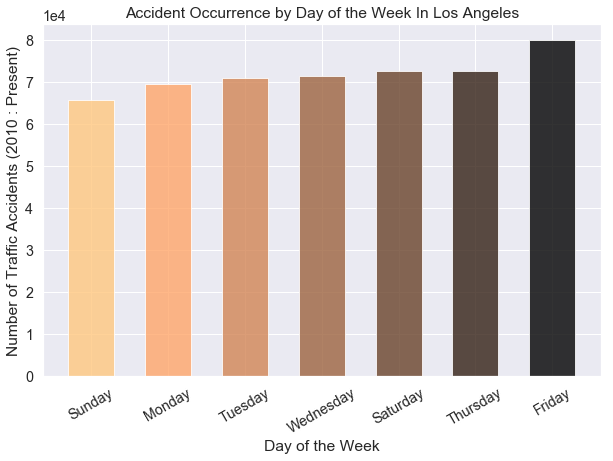

In [66]:
#---Lets see what day of the week are accidents most like to occur---#
weekday_occur_df = collision_df[['weekday_occurred']].reset_index()
weekday_occur_df_gr = weekday_occur_df.groupby('weekday_occurred').count().sort_values(by=['index'], ascending=True).reset_index().rename(columns={'index':'count'})

#---Define color scale---#
color = cm.copper_r(np.linspace(0, 1, 7))

#---Now we can plot a bar graph of the data---#
fig = plt.figure(figsize=(10,7))
plt.bar(range(len(weekday_occur_df_gr['count'])), weekday_occur_df_gr['count'], width=0.6, color=color, align='center', alpha=0.8)
plt.title('Accident Occurrence by Day of the Week In Los Angeles')
plt.ylabel("Number of Traffic Accidents (2010 : Present)")
plt.xlabel("Day of the Week")
ax=plt.subplot()
ax.set_xticklabels(weekday_occur_df_gr['weekday_occurred'])
plt.xticks(range(len(weekday_occur_df_gr['count'])), rotation=30)
plt.ticklabel_format(axis='y', style='scientific', scilimits=(0,0))
plt.subplots_adjust(bottom=0.18)
fig.savefig('Weekday_analysis.pdf', dpi=150)
plt.show()
plt.close('all')


### <font  color=blue> Men are over 20% more likely to be the victim of a traffic accident than women in LA! </font>

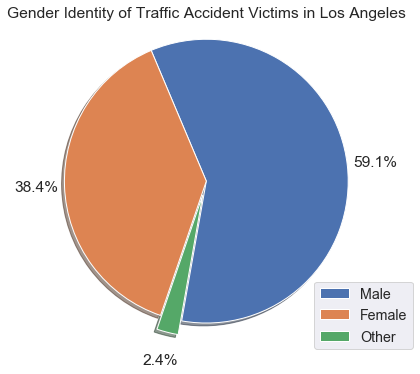

In [37]:
#---Are men or women more likely to be the victim of a traffic accident?---#
victim_gen_df = collision_df[['victim_sex']].reset_index()
victim_gen_df_gr = victim_gen_df.groupby('victim_sex').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets add a column to group together the people who identify as neither male or female---#
victim_gen_df_gr['gender_label'] = victim_gen_df_gr.apply(lambda row: row['victim_sex'] if (row['victim_sex'] == 'M') | (row['victim_sex'] == 'F') else 'X', axis=1)
victim_gen_df_grgr = victim_gen_df_gr.groupby('gender_label').sum().sort_values(by=['count'], ascending=False).reset_index()

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set_palette('Spectral')
sns.set(font_scale=1.3)

gender_label = ['Male', 'Female', 'Other']
explode = [0, 0, 0.1]

plt.figure(figsize=(6,6))    
plt.pie(victim_gen_df_grgr['count'], labels = None, shadow = True, autopct='%1.1f%%', pctdistance = 1.2, startangle=1700, explode=explode)
plt.title('Gender Identity of Traffic Accident Victims in Los Angeles')
plt.legend(gender_label,bbox_to_anchor=(0.8,0.23), loc="upper left")
plt.ylabel("")
plt.axis('equal')
plt.savefig('Gender_Identity.pdf', dpi=150)
plt.show()
plt.close('all')

### <font  color=blue> The most dangerous intersection in LA isn't downtown, it's over 20 miles away! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


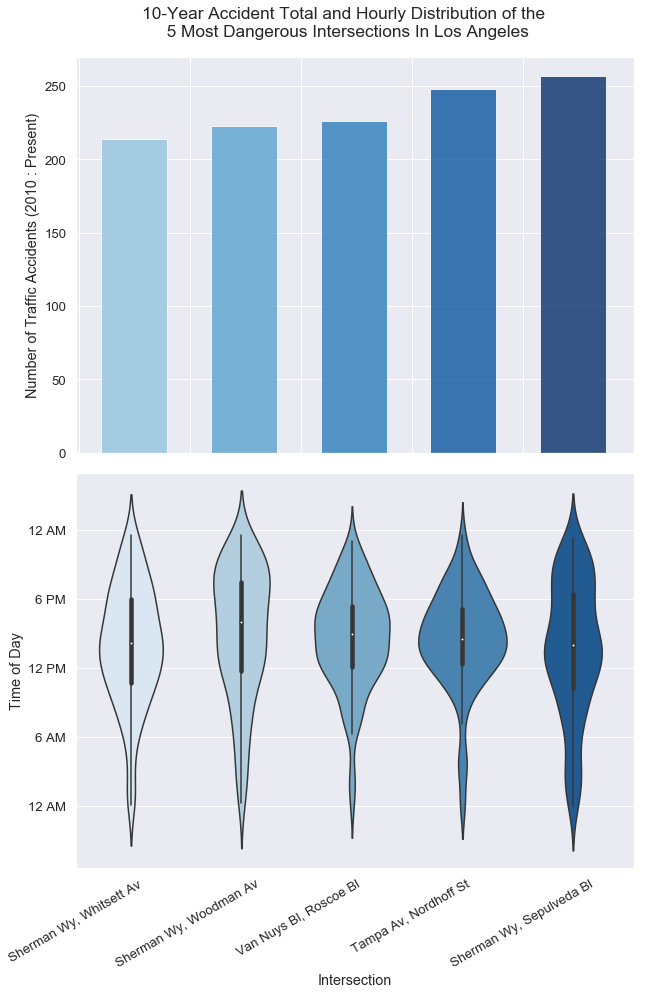

In [42]:
#---Whats the most dangerous intersection in LA?---#
collision_intersection_df = collision_df['intersection'].reset_index()
collision_intersection_df_gr = collision_intersection_df.groupby('intersection').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets grab only the top 5 most dangerous intersections---#
top_five_intersection = collision_intersection_df_gr.iloc[:5]
top_five_intersection.sort_values(by=['count'], inplace=True)

#---The most dangerous intersection is 21 miles from downtown LA!---#

#---What times do accidents occur at these intersections? Lets examine the top 5 intersections with the most accidents---#
intersection = list(top_five_intersection['intersection'])

time_intersection_df = collision_df[['time_occurred', 'intersection']]
time_top5_intersection_df = time_intersection_df[(time_intersection_df.intersection.isin(intersection))].reset_index()

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
palette=sns.color_palette('Blues', n_colors=5)
sns.set(font_scale=1.2)

#---Lets make two verticle graphs to display this data together---#
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Intersections In Los Angeles')
fig.set_figheight(14)
fig.set_figwidth(10)

#---Define color scale---#
color = cm.Blues(np.linspace(0.4, 1, 5))

#---This is a bar plot to show the total number of accidents for each intersection---#
plt.subplot(211)
ax1 = plt.bar(range(len(top_five_intersection['count'])), top_five_intersection['count'], width=0.6, color=color, align='center', alpha=0.8)
plt.ylabel("Number of Traffic Accidents (2010 : Present)")
plt.xticks(np.arange(-0.5, 5.5, 1.01), [], rotation=30)

#---This is a violin plot showing the distribution of the times of accidents for each intersection---#
plt.subplot(212)
ax2 = sns.violinplot(data=time_top5_intersection_df, x='intersection', y='time_occurred', order=intersection, palette=palette)
ax2.set_yticks([0, 600, 1200, 1800, 2400])
ax2.set_yticklabels(['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
ax2.set_xlabel('Intersection')
ax2.set_ylabel('Time of Day')
plt.xticks(np.arange(-0.5, 5.5, 1.01), rotation=30)

plt.subplots_adjust(top=0.93, hspace=0.05)
plt.show()
fig.savefig('Intersection_Analysis.pdf', dpi=150)
plt.close('all')

#---Old versions of the figures--_#
#---Now we can plot a bar graph of the data---#
#plt.figure(figsize=(10,7))
#plt.bar(range(len(top_five_intersection['count'])), top_five_intersection['count'], width=0.6, color=color, align='center', alpha=0.8)
#plt.title('Most Dangerous Intersections In Los Angeles')
#plt.ylabel("Number of Traffic Accidents (2010 : Present)")
#plt.xlabel("Intersection")
#ax=plt.subplot()
#plt.xticks(np.arange(-0.5, 5.5, 1.01), rotation=30)
#ax.set_xticklabels(top_five_intersection['intersection'])
#plt.show()
#plt.close('all')

#plt.figure(figsize=(10,7))
#ax = sns.violinplot(data=time_top5_intersection_df, x='intersection', y='time_occurred', order=intersection, palette=palette)
#ax.set_yticks([0, 600, 1200, 1800, 2400])
#ax.set_yticklabels(['12:00 AM', '6:00 AM', '12:00 PM', '6:00 PM', '12:00 AM'])
#ax.set_xlabel('Intersection')
#ax.set_ylabel('Time of Day')
#plt.xticks(np.arange(-0.5, 5.5, 1.01), rotation=30)
#plt.title(f'Occurance of Daily Traffic Accidents at the 5 Most Dangerous Intersections in LA')
#plt.show()


### <font  color=blue> Only about 75% of accidents are reported the same day they occur, the other 25% are reported within a week </font>

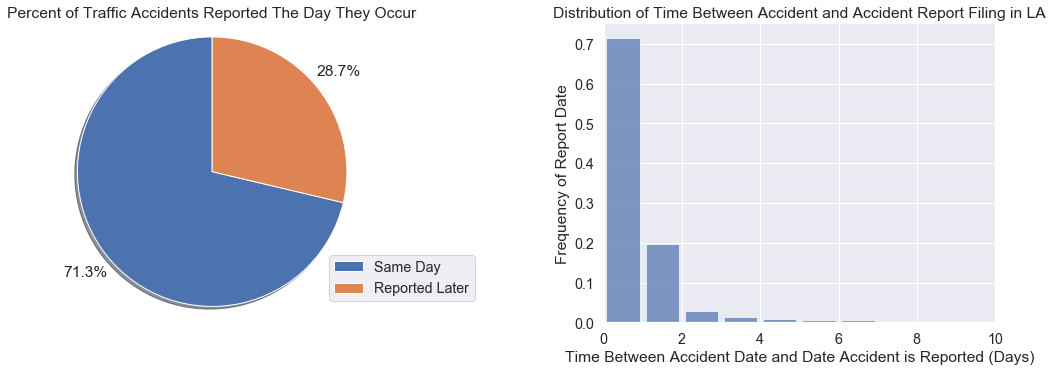

In [68]:
#---How many accidents are reported the same day they occur?---#

#---This is the total number of accidents obtained by the length of the collision_df dataframe---#
total_accidents = len(collision_df)

#---How many collisions were reported on the same day they occur?---#
collision_date_df = collision_df[['date_reported', 'date_occurred']].reset_index()
reported_same_day_df = collision_date_df[collision_date_df.date_reported == collision_date_df.date_occurred].reset_index()
reported_same_day = len(reported_same_day_df)

#---Calculate how many accidents were reported later---#
reported_later = total_accidents - reported_same_day

#---Form a list and labels of our report data---#
report_data = [reported_same_day, reported_later]
report_label = ['Same Day', 'Reported Later']

#---If they're not reported the same day then when are they reported?---#
date_delta_df = collision_df[['date_delta']].reset_index()
date_delta_df_100 = date_delta_df[date_delta_df.date_delta <= 100]

#---Now we can plot this data---#

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set_palette('Spectral')
sns.set(font_scale=1.3)

#---Lets make two graphs to display this data---#
fig, (ax1, ax2) = plt.subplots(2)
fig.set_figheight(5.5)
fig.set_figwidth(16)

#------This is a pie plot showing the percent of accidents which are reported the day they occur------#
plt.subplot(121)
ax1 = plt.pie(report_data, labels = None, shadow = True, autopct='%1.1f%%', pctdistance = 1.2, startangle=90)
plt.title('Percent of Traffic Accidents Reported The Day They Occur')
plt.legend(report_label,bbox_to_anchor=(0.78,0.25), loc="upper left")
plt.ylabel("")
plt.axis('equal')

#---This is a histogram showing the distribution of time between accident and report filing in days---#
plt.subplot(122)
ax2 = plt.hist(date_delta_df_100['date_delta'], bins=100, color='b', alpha=0.7, rwidth=0.85, density=True)
plt.xlim(0, 10)
plt.xlabel(f'Time Between Accident Date and Date Accident is Reported (Days)')
plt.ylabel('Frequency of Report Date')
plt.title(f'Distribution of Time Between Accident and Accident Report Filing in LA')

#---Now adjust and show the plots---#
plt.subplots_adjust(left = 0.05, wspace=0.5)
plt.show()

#---Lets save this figure and close out of it---#
fig.savefig('Report_Filing.pdf', dpi=150)
plt.close('all')

#---Old versions of the figures---#
#plt.figure(figsize=(6,6))    
#plt.pie(report_data, labels = None, shadow = True, autopct='%1.1f%%', pctdistance = 1.2, startangle=90)
#plt.title('Percent of Traffic Accidents Reported The Day They Occur')
#plt.legend(report_label,bbox_to_anchor=(0.9,0.35), loc="upper left")
#plt.ylabel("")
#plt.axis('equal')
#plt.show()
#plt.close('all')

#plt.figure(figsize=(10,6))
#plt.hist(date_delta_df_100['date_delta'], bins=100, color='b', alpha=0.7, rwidth=0.85, density=True)
#plt.xlim(0, 10)
#plt.xlabel(f'Time Between Accident Date and Date Accident is Reported (Days)')
#plt.ylabel('Frequency of Report Date')
#plt.title(f'Distribution of Time Between Accident and Accident Report Filing in LA')
#plt.show()
#plt.close('all')

### <font  color=blue> Over 95% of accidents occur on streets, another 3% in parking lots, but freeways are suprising safe! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


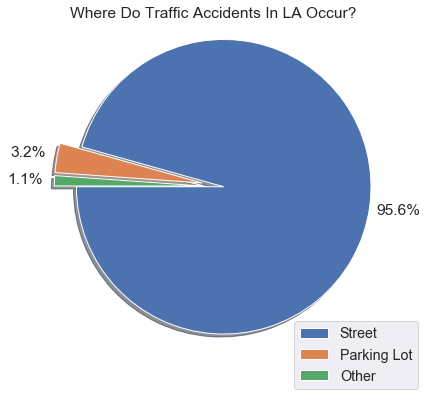

In [79]:
#---Whats the most dangerous premise?---#
collision_premdescript_df = collision_df[['premise_description']].reset_index()
collision_premdescript_df_gr = collision_premdescript_df.groupby('premise_description').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

top_ten_premdescript = collision_premdescript_df_gr.iloc[:10]
top_ten_premdescript.sort_values(by=['count'], inplace=True)

#---Lets group everything except the top 2 premises into a single 'other' category---#
top_ten_premdescript['premise_label'] = top_ten_premdescript.apply(lambda row: row['premise_description'] if (row['premise_description'] == 'Street') | (row['premise_description'] == 'Parking Lot') else 'Other', axis=1)
top_ten_premdescript_gr = top_ten_premdescript.groupby('premise_label').sum().sort_values(by=['count'], ascending=False).reset_index()

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set_palette('Spectral')
sns.set(font_scale=1.3)

premise_label = list(top_ten_premdescript_gr.premise_label)
explode = [0, 0.15, 0.15]

plt.figure(figsize=(6,6))    
plt.pie(top_ten_premdescript_gr['count'], labels = None, shadow = True, autopct='%1.1f%%', pctdistance = 1.2, startangle=180, explode=explode)
plt.title('Where Do Traffic Accidents In LA Occur?')
plt.legend(premise_label,bbox_to_anchor=(0.72,0.11), loc="upper left")
plt.ylabel("")
plt.axis('equal')
plt.savefig('Accident_Locations.pdf', dpi=150)
plt.show()


### <font  color=blue> The most dangerous street in LA is Western Avenue, over 6000 accidents in the last 10 years! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


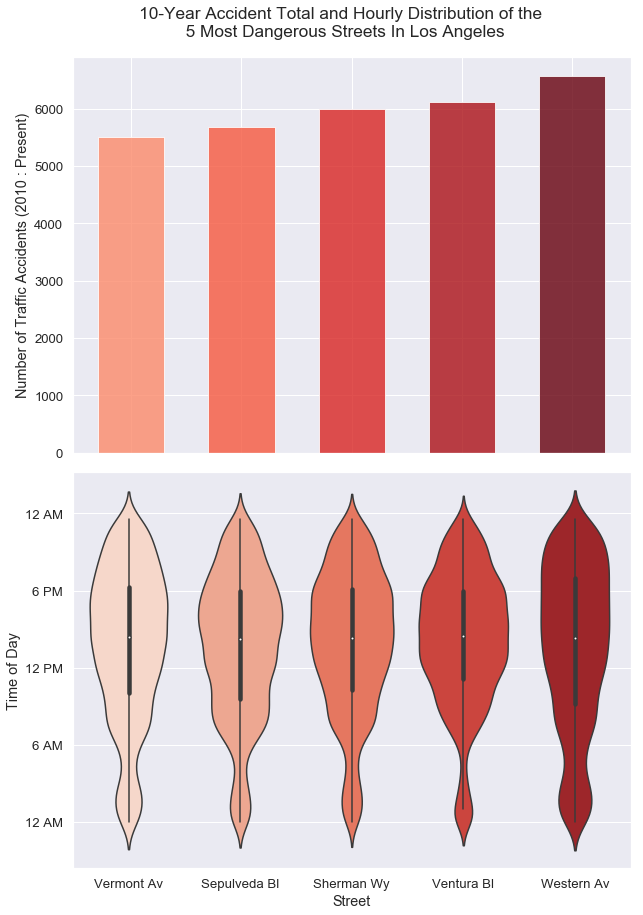

In [92]:
#---Which street is the most dangerous?---#
collision_add_df = collision_df[['address']].reset_index()
collision_add_df_gr = collision_add_df.groupby('address').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets grab the top five most dangerous streets---#
top_five_addresses = collision_add_df_gr.iloc[:5]
top_five_addresses.sort_values(by=['count'], inplace=True)

#---What times do accidents occur on these streets? Lets examine the top 5 intersections with the most accidents---#
streets = list(top_five_addresses['address'])
time_street_df = collision_df[['time_occurred', 'address']]
time_top5_street_df = time_street_df[(time_street_df.address.isin(streets))].reset_index()

#---Now we can plot the data---#

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
palette=sns.color_palette('Reds', n_colors=5)
sns.set(font_scale=1.2)

#---Define color scale---#
color = cm.Reds(np.linspace(0.4, 1, 5))

#---Lets make two verticle graphs to display this data together---#
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Streets In Los Angeles')
fig.set_figheight(14)
fig.set_figwidth(10)

#---This is a bar plot to show the total number of accidents for each street---#
plt.subplot(211)
ax1 = plt.bar(range(len(top_five_addresses['count'])), top_five_addresses['count'], width=0.6, color=color, align='center', alpha=0.8)
plt.ylabel("Number of Traffic Accidents (2010 : Present)")
plt.xticks(range(len(streets)), [], rotation=0)

#---This is a violin plot showing the distribution of the times of accidents for each street---#
plt.subplot(212)
ax2 = sns.violinplot(data=time_top5_street_df, x='address', y='time_occurred', order=streets, palette=palette)
ax2.set_yticks([0, 600, 1200, 1800, 2400])
ax2.set_yticklabels(['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
ax2.set_xlabel('Street')
ax2.set_ylabel('Time of Day')
plt.xticks(range(len(streets)), rotation=0)

plt.subplots_adjust(top=0.93, hspace=0.05)
plt.show()
fig.savefig('Street_Analysis.pdf', dpi=150)
plt.close('all')

#---Old versions of the figures---#
#---Now we can plot a bar graph of the data---#
#plt.figure(figsize=(10,7))
#plt.bar(range(len(top_five_addresses['count'])), top_five_addresses['count'], width=0.6, color=color, align='center', alpha=0.8)
#plt.title('Most Dangerous Streets In LA')
#plt.ylabel("Number of Traffic Accidents (2010 : Present)")
#plt.xlabel("Street")
#ax=plt.subplot()
#plt.xticks(np.arange(-0.2, 10, 1), rotation=60)
#ax.set_xticklabels(top_five_addresses['address'])
#plt.show()
#plt.close('all')

#plt.figure(figsize=(10,7))
#ax = sns.violinplot(data=time_top5_street_df, x='address', y='time_occurred', order=streets, palette=palette)
#ax.set_yticks([0, 600, 1200, 1800, 2400])
#ax.set_yticklabels(['12:00 AM', '6:00 AM', '12:00 PM', '6:00 PM', '12:00 AM'])
#ax.set_xlabel('Street')
#ax.set_ylabel('Time of Day')
#plt.xticks(range(len(streets)))
#plt.title(f'Occurance of Daily Traffic Accidents at the 5 Most Dangerous Streets in LA')
#plt.show()
#plt.close('all')


### <font  color=blue> While Western Avenue might be the most dangerous street, the most dangerous Traffic area is around 77th street! </font>

C:\Users\nlaur\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


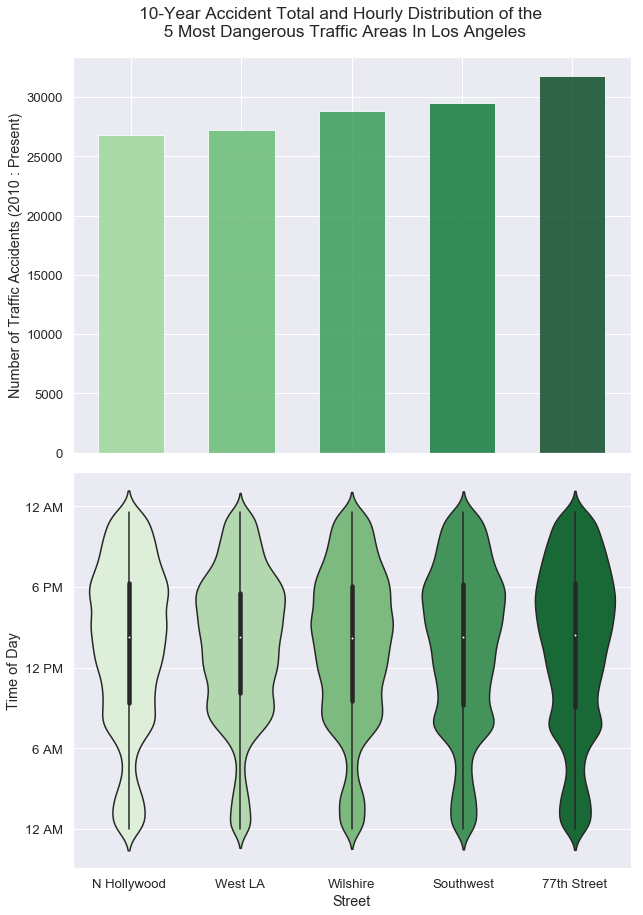

In [96]:
#---Which street is the most dangerous?---#
collision_areas_df = collision_df[['area_name']].reset_index()
collision_areas_df_gr = collision_areas_df.groupby('area_name').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets grab the top five most dangerous streets---#
top_five_areas = collision_areas_df_gr.iloc[:5]
top_five_areas.sort_values(by=['count'], inplace=True)

#---What times do accidents occur on these streets? Lets examine the top 5 intersections with the most accidents---#
areas = list(top_five_areas['area_name'])
time_areas_df = collision_df[['time_occurred', 'area_name']]
time_top5_areas_df = time_areas_df[(time_areas_df.area_name.isin(areas))].reset_index()

#---Now we can plot the data---#

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
palette=sns.color_palette('Greens', n_colors=5)
sns.set(font_scale=1.2)

#---Define color scale---#
color = cm.Greens(np.linspace(0.4, 1, 5))

#---Lets make two verticle graphs to display this data together---#
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('10-Year Accident Total and Hourly Distribution of the \n 5 Most Dangerous Traffic Areas In Los Angeles')
fig.set_figheight(14)
fig.set_figwidth(10)

#---This is a bar plot to show the total number of accidents for each traffic area---#
plt.subplot(211)
ax1 = plt.bar(range(len(top_five_areas['count'])), top_five_areas['count'], width=0.6, color=color, align='center', alpha=0.8)
plt.ylabel("Number of Traffic Accidents (2010 : Present)")
plt.xticks(range(len(areas)), [], rotation=0)

#---This is a violin plot showing the distribution of the times of accidents in each traffic area---#
plt.subplot(212)
ax2 = sns.violinplot(data=time_top5_areas_df, x='area_name', y='time_occurred', order=areas, palette=palette)
ax2.set_yticks([0, 600, 1200, 1800, 2400])
ax2.set_yticklabels(['12 AM', '6 AM', '12 PM', '6 PM', '12 AM'])
ax2.set_xlabel('Street')
ax2.set_ylabel('Time of Day')
plt.xticks(range(len(areas)), rotation=0)

plt.subplots_adjust(top=0.93, hspace=0.05)
plt.show()
fig.savefig('Traffic_Area_Analysis.pdf', dpi=150)
plt.close('all')

#---Old versions of the figures---#
#---Now we can plot a bar graph of the data---#
#plt.figure(figsize=(10,7))
#plt.bar(range(len(top_five_areas['count'])), top_five_areas['count'], width=0.6, color=color, align='center', alpha=0.8)
#plt.title('Most Dangerous Traffic Areas In LA')
#plt.ylabel("Number of Traffic Accidents (2010 : Present)")
#plt.xlabel("Traffic Area")
#ax=plt.subplot()
#plt.xticks(np.arange(-0.2, 5, 1), rotation=60)
#ax.set_xticklabels(top_five_areas['area_name'])
#plt.show()
#plt.close('all')

#plt.figure(figsize=(10,7))
#ax = sns.violinplot(data=time_top5_areas_df, x='area_name', y='time_occurred', order=areas, palette=palette)
#ax.set_yticks([0, 600, 1200, 1800, 2400])
#ax.set_yticklabels(['12:00 AM', '6:00 AM', '12:00 PM', '6:00 PM', '12:00 AM'])
#ax.set_xlabel('Traffic Area')
#ax.set_ylabel('Time of Day')
#plt.xticks(range(len(streets)))
#plt.title(f'Occurance of Daily Traffic Accidents at the 5 Most Dangerous Traffic Areas of LA')
#plt.show()


### <font  color=blue> People of Hispanic descent are most likely to be the victim of a traffic accident, but this could be controlled by population demographics </font>

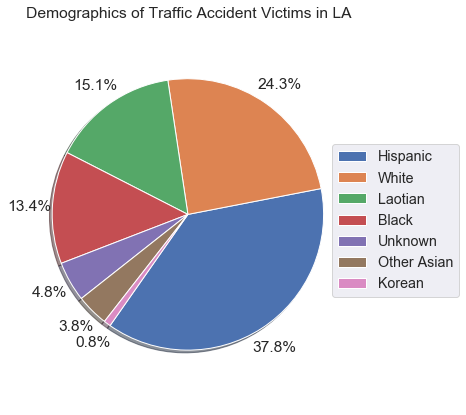

In [108]:
#---Whats are the demographics of traffic accidents in LA?---#
collision_victim_dec_df = collision_df[['victim_descent']].reset_index()
collision_victim_dec_df_gr = collision_victim_dec_df.groupby('victim_descent').count().sort_values(by=['index'], ascending=False).reset_index().rename(columns={'index':'count'})

#---Lets grab on victim descents that have over 2000 traffic accidents---#
collision_victim_dec_df_gr_2000 = collision_victim_dec_df_gr[collision_victim_dec_df_gr['count'] >= 2000]
collision_victim_dec_df_gr_2000.head(30)

#---Set Seaborn style & font size---#
sns.set_style('darkgrid', {'xtick.bottom': True, 'ytick.left': True})
sns.set(font_scale=1.3)

#---These labels are from looking up the descent codes on the LA.gov's website---#
descent_labels = ['Hispanic', 'White', 'Laotian', 'Black', 'Unknown', 'Other Asian', 'Korean']
explode = [0, 0, 0, 0, 0, 0, 0]

fig = plt.figure(figsize=(7,7))  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
ax = plt.pie(collision_victim_dec_df_gr_2000['count'], labels = None, shadow = True, autopct='%1.1f%%', pctdistance = 1.17, startangle=235, explode=explode)
plt.title('Demographics of Traffic Accident Victims in LA', loc='center')
plt.legend(descent_labels,bbox_to_anchor=(0.95,0.7), loc="upper left")
plt.ylabel("")
plt.axis('equal')
plt.savefig('Accident_demographics.pdf', dpi=150)
plt.show()


### <font  color=blue> Lets plot the accident locations on a map of LA </font>

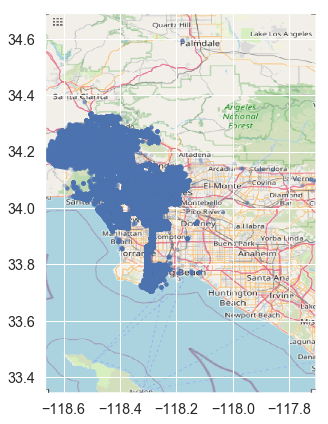

In [117]:
#---Lets plot the longitude and latitudes of accident locations on a map of LA---#
locations_df = collision_df[['longitude', 'latitude']].reset_index()

#---If the accident location wasn't recorded than it was marked as (0.0, 0.0) in the report, lets remove these rows---#
locations_df_clean = locations_df[(locations_df['latitude'] != 0.0) & (locations_df['longitude'] != 0.0)]

#---This box forms the limits of our map---#
BBox = (locations_df_clean.longitude.min(), locations_df_clean.longitude.max(), locations_df_clean.latitude.min(), locations_df_clean.latitude.max())

#---Load a map of LA---#
LAMap = plt.imread('LAMap.png')

#---Plot the geographic data ontop of the plot---#
fig, ax = plt.subplots(figsize = (12,7))
ax.scatter(locations_df_clean.longitude, locations_df_clean.latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(LAMap, zorder=0, extent = BBox, aspect= 'equal')
plt.show()
fig.savefig('locationplot.pdf', dpi=150)
plt.close('all')
